In [1]:
import sys

sys.path.append("../src/")
sys.path.append("../data/cities/")

from matplotlib.pyplot import *
import scipy as sp
from scipy import optimize
import numpy as np
from math import *

%matplotlib inline

# ALZ law (City size distribution)

In [2]:
import australia,brazil,germany,usa,uk
xa,ya = australia.income()
xb, yb = brazil.gdp(2010) # Options for Brazil: gdp,aids,externalCauses
xg,yg = germany.gdp()
xu,yu = usa.gdp()
#xk,yk=uk.row('Income') 
xk,yk=uk.row('NetIncome') 
#xw = world.pop()

p = {}
p["Australia"]=xa
p["Brazil"]=xb
p["Germany"]=xg
p["UK"]=xk
p["USA"]=xu
#p["world"]=xw

In [3]:
def f(alpha,args):
    N=args[0]
    P=args[1]
    X=args[2]
    return 1-np.exp(alpha*N)+P*alpha/X

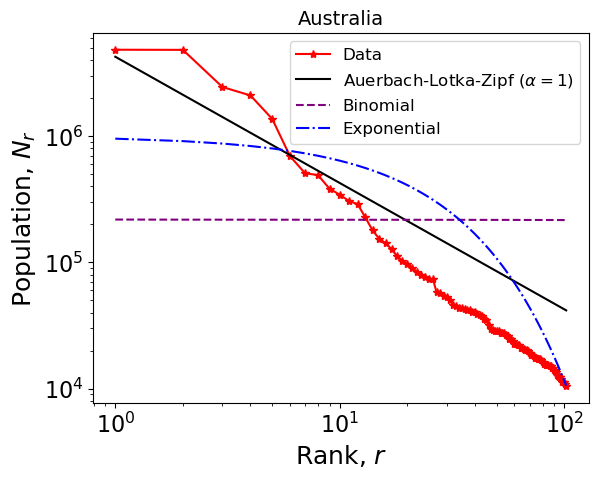

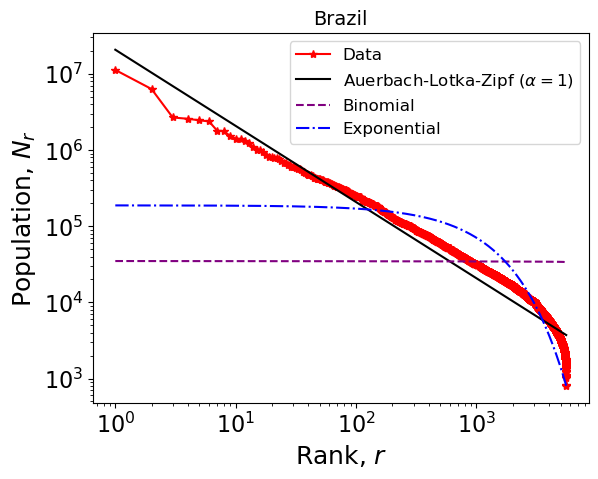

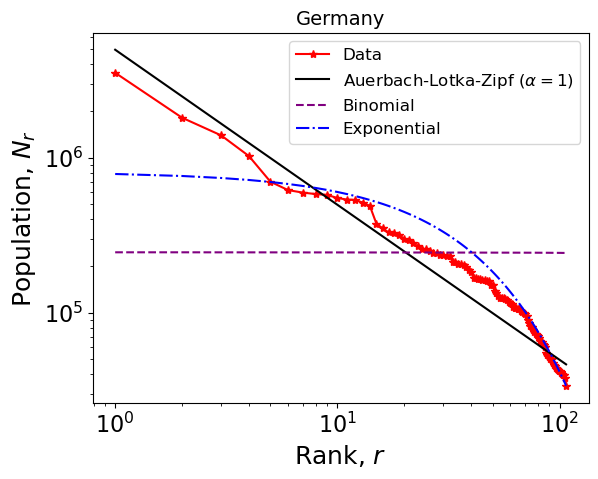

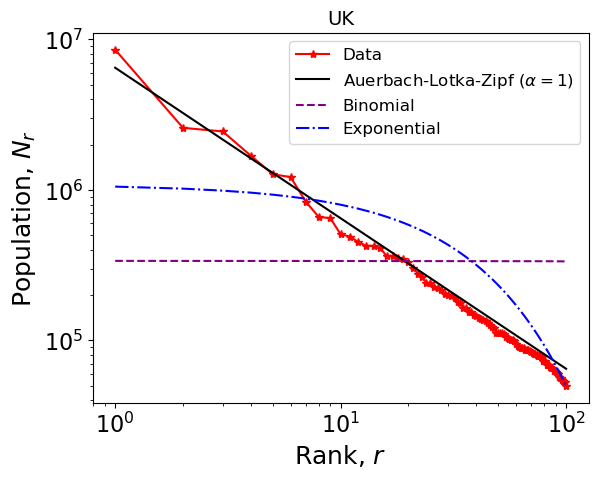

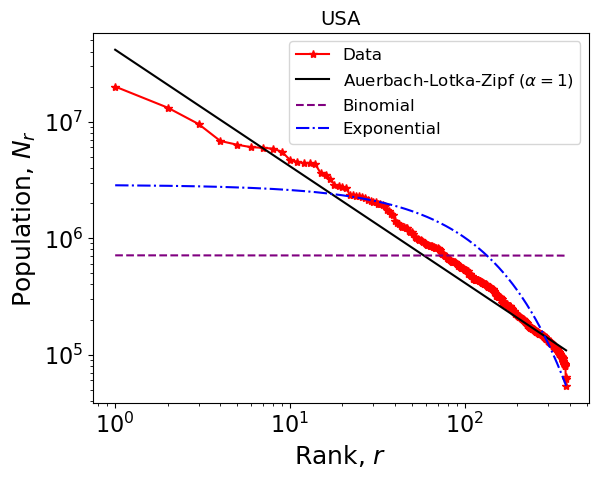

In [4]:
for country in p.keys():
    x=p[country]

    x=sorted(x,reverse=True)

    r=np.arange(1*len(x))+1

    P = sum(x) #total population
    N = len(x) # number of cities
    xbinomial = np.random.binomial(P,1/N,N)
    #xbinomial[::-1].sort()

    #print(N,P/x[N-1])

    xpoisson=np.random.poisson(P/N,N)


    #exponential model
    #alpha = sp.optimize.zeros.bisect(f,0.00000000000000000001,0.1,[N,P,x[N-1]])
    alpha = sp.optimize.bisect(f,0.00000000000000000001,0.1,[N,P,x[N-1]])

    A = x[N-1]*np.exp(alpha*N)

    #Zipf pre-factor
    #C = P/\sum 1/r 
    C=P/np.sum((1/r)[:N])

    figure()
    yscale("log")
    xscale("log")
    xlabel(r"Rank, $r$",fontsize=18)
    ylabel(r"Population, $N_r$",fontsize=18)
    plot(range(len(x)+1)[1:],sorted(x,reverse=True),"*-",color="red",markeredgecolor="red",label="Data")
    plot(r,C/r,"-",color="black",label=r"Auerbach-Lotka-Zipf ($\alpha=1$)")
    plot(range(len(x)+1)[1:],sorted(xbinomial,reverse=True),"--",color="purple",label="Binomial")
    plot(r,A*np.exp(-alpha*r),"-.",color="blue",label="Exponential")
    title(country,fontsize=14)
    legend(fontsize=12,loc=1)
    tick_params(axis='both', which='major', labelsize=16)
    savefig("fig/figCities"+country+".png",dpi=300,bbox_inches='tight')
    show()

### Exponential Model

$F_r = A e^{-\alpha r}$

for $r=1, \ldots, N$

Constraints to be imposed: 

$\sum_{r=1}^N F_r = P \text{ (total population) }$

$F_N = A e^{-\alpha N} = X \text{ (the empirically computed population of smallest town) }$

Using (2) to fix $A$ we have that:

$P/X = \sum_{r=1}^N e^{-\alpha(r-N)} \approx \int_0^N e^{\alpha(N-r)} = (e^{\alpha(N-a)}-1)/\alpha$

$\Rightarrow 1-e^{\alpha(N-a)} +P \alpha/X=0$

Solving for $\alpha$ we have $\alpha=0$ and a non-trivial solution of interest.



## Figure for paper


In [5]:
import pandas as pd
data=pd.read_csv("../data/cities/germany/auerbach.csv",names=["N","void"])
auerbach2=[(237,2000)]

In [6]:
data["N"]

1     3579
2     1168
3      622
4      610
5      593
      ... 
90      54
91      54
92      53
93      50
94      50
Name: N, Length: 94, dtype: int64

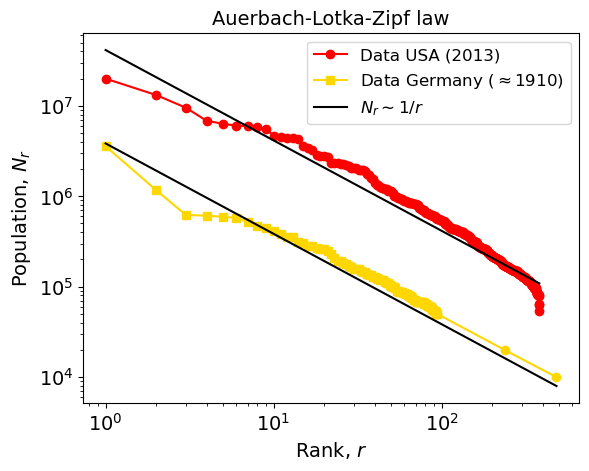

In [7]:

figure()
yscale("log")
xscale("log")
xlabel(r"Rank, $r$",fontsize=14)
ylabel(r"Population, $N_r$",fontsize=14)



country="USA"
x=p[country]
x=sorted(x,reverse=True)
r=np.arange(1*len(x))+1
P = sum(x) #total population
N = len(x) # number of cities
#Zipf pre-factor
#C = P/\sum 1/r 
C=P/np.sum((1/r)[:N])
plot(range(len(x)+1)[1:],sorted(x,reverse=True),"o-",color="red",label="Data USA (2013)")
r=np.arange(1*len(x))+1
plot(r,C/r,"-",color="black")


country="Germany"
x=data["N"]*1000
P = sum(x) #total population
N = len(x) # number of cities
C=P/np.sum((1/r)[:N])
plot(range(len(x)+1)[1:],sorted(x,reverse=True),"s-",color="gold",label=r"Data Germany ($\approx1910$)")
plot([94,236.5,481.5],[50000,20000,10000],"o-",color="gold")
r=np.arange(482)+1
#plot(r,C/r,"-",color="black",label=r"$ N_r \sim 1/ r$)
plot(r,C/r,"-",color="black",label=r"$ N_r \sim 1/ r$")

#country="UK"
#x=p[country]
#x=sorted(x,reverse=True)
#r=np.arange(1*len(x))+1
#P = sum(x) #total population
#N = len(x) # number of cities
#3Zipf pre-factor
#C = P/\sum 1/r 
#C=P/np.sum((1/r)[:N])
#plot(range(len(x)+1)[1:],sorted(x,reverse=True),"s-",color="cyan",label="Data UK")
#plot(r,C/r,"-",color="black",label=r"$ N_r \sim 1/ r$")



title("Auerbach-Lotka-Zipf law",fontsize=14)
legend(fontsize=12,loc=1)
tick_params(axis='both', which='major', labelsize=14)
savefig("figCitiesALZ.png",dpi=300,bbox_inches='tight')
show()

## Different representations

### Compute cumulative distributions

In [8]:
xb

array([     805,      815,     1020, ...,  2675656,  6320446, 11253503])

In [10]:
cumulative=[[],[]]
y=1
for i in range(len(x)):
    cumulative[0].append(y)
    #print(recurrences[0][i],y)
    y=y-1/len(x)
    #print(recurrence[i],y)

y=1
for i in range(len(xb)):
    cumulative[1].append(y)
    y=y-1/len(xb)

xb.sort()

Compute thresholds for Brazil data, only cities larger than 10,000

In [11]:
x2a= np.array(xb)
N2 = sum(x2a>10000)
ynorm = sum(x2a>10000)/len(x2a)

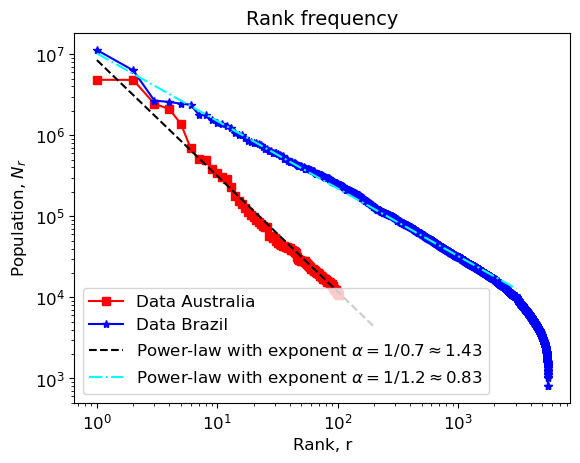

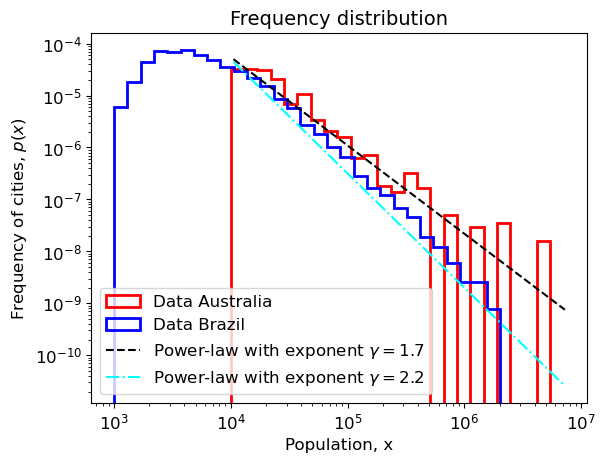

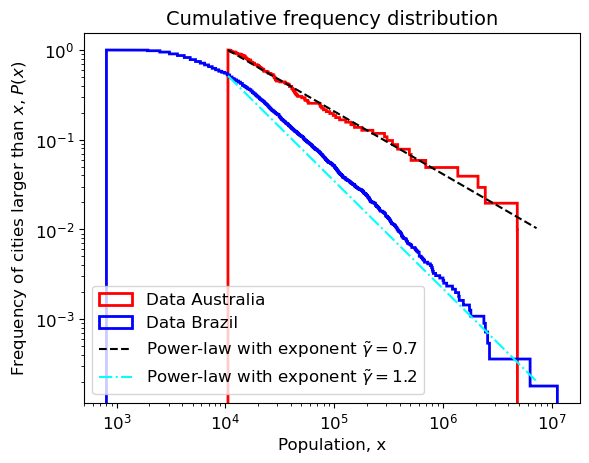

In [12]:
font = {'size'   : 12}

matplotlib.rc('font', **font)
matplotlib.rcParams.update({'font.size': 12})
x=p['Australia']
x2=p['Brazil']
x=sorted(x,reverse=True)
x2=sorted(x2,reverse=True)
r=np.arange(2*len(x))+1
y=np.arange(min(x),1.5*max(x),1000)
P = sum(x) #total population
N = len(x) # number of cities
C=P/np.sum((1/r)[:N])

C7=P/np.sum((1/r**(1/0.7))[:N])

r2=np.arange(N2)+1
P2 = sum(x2[:N2]) #total population
C2=P2/np.sum((1/r2**(1/1.2))[:N2])


# Rank-frequency log-log
figure()
plot(range(len(x)+1)[1:],sorted(x,reverse=True),"s-",color="red",markeredgecolor="red",label="Data Australia")
plot(range(len(x2)+1)[1:],sorted(x2,reverse=True),"*-",color="blue",markeredgecolor="blue",label="Data Brazil")
#plot(r,C/r,"-",color="black",label=r"Auerbach-Lotka-Zipf ($\alpha=1$)")
plot(r,C7/r**(1/0.7),"--",color="black",label=r"Power-law with exponent $\alpha=1/0.7\approx 1.43$")
plot(r2,C2/r2**(1/1.2),"-.",color="cyan",label=r"Power-law with exponent $\alpha=1/1.2\approx 0.83$")
xscale('log')
yscale('log')
xlabel("Rank, r")
ylabel(r"Population, $N_r$")
legend(loc=3)
title("Rank frequency",fontsize=14)
savefig("fig/representations-Zipf1.png",dpi=300,bbox_inches='tight')
show()

gammatilda=0.7
gammatilda2=1.2
x2cut=10**4

# Freq. distribution, log bins

logBins=[(1.3**i)*(10**4) for i in range(26)]
logBins2=[(1.3**i)*(10**3) for i in range(30)]

figure()
hist(x,cumulative=0,bins=logBins,density=True,histtype='step',linewidth=2,color="red",label="Data Australia")
hist(x2,cumulative=0,bins=logBins2,density=True,histtype='step',linewidth=2,color="blue",label="Data Brazil")
plot(y,0.5*10**(-4)*min(x)**(gammatilda+1)/y**(gammatilda+1),"--",color="black",label=r"Power-law with exponent $\gamma=1.7$")
plot(y,0.5*10**(-4)*x2cut**(gammatilda2+1)/y**(gammatilda2+1),"-.",color="cyan",label=r"Power-law with exponent $\gamma=2.2$")

xscale('log')
yscale('log')
#ylim(1*10**(-9),5*10**(-5))
#xlim(1*10**4,6*10**6)
ylabel(r"Frequency of cities, $p(x)$")
xlabel("Population, x")
legend(loc=3)
title("Frequency distribution",fontsize=14)
savefig("fig/representations-Zipf2.png",dpi=300,bbox_inches='tight')
show()

# Freq. Distibution, cumulative

ynorm= 0.5484276729559748 # see below, computed from cumulative distribution

figure()
hist(x,cumulative=-1,bins=20000,density=True,histtype='step',linewidth=2,color="red",label="Data Australia")
hist(x2,cumulative=-1,bins=20000,density=True,histtype='step',linewidth=2,color="blue",label="Data Brazil")
plot(y,min(x)**gammatilda/y**gammatilda,"--",color="black",label=r"Power-law with exponent $\tilde{\gamma}=0.7$")
plot(y,ynorm*x2cut**gammatilda2/y**gammatilda2,"-.",color="cyan",label=r"Power-law with exponent $\tilde{\gamma}=1.2$")
#plot(y,min(x)**1/y**1,color="black")
xscale('log')
yscale('log')
ylabel(r"Frequency of cities larger than $x$, $P(x)$")
xlabel("Population, x")
#xlim(2*10**3,6*10**6)
legend()
title("Cumulative frequency distribution",fontsize=14)
savefig("fig/representations-Zipf3.png",dpi=300,bbox_inches='tight')
show()

# Urban Scaling laws

- Repository: [https://github.com/edugalt/scaling](https://github.com/edugalt/scaling)

- Reference: J. C. Leitao, J.M. Miotto, M. Gerlach, and E. G. Altmann, "Is this scaling nonlinear?", Royal Society Open Science 3, 150649 (2016) [DOI: 10.1098/rsos.150649](http://rsos.royalsocietypublishing.org/content/3/7/150649).

- Remove results from folder "_results" to ensure original computations (instead of reading from stored results)

In [13]:
import scipy as sp

In [14]:
import analysis_urbanScaling as a

In [15]:

#Pop=a.PopulationAnalysis("uk_income",required_successes=2)

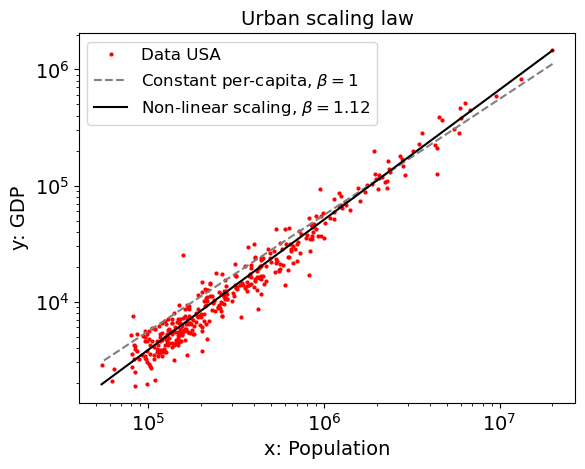

In [16]:
x,y=xu[yu>0],yu[yu>0]
#x,y=xg[yg>0],yg[yg>0]
LS=a.mls_best_fit(np.log(x),np.log(y))
figure()
xlabel("x: Population",fontsize=14)
ylabel("y: GDP",fontsize=14)
xscale("log")
yscale("log")
plot(x,y,"o",ms=2,color="red",label="Data USA")
#plot(x, np.exp(LS[2])*x**LS[0], "-", ms=2,color="red",label=r"Non-linear scaling, $\beta=$"+str(LS[0])[:4])
# People's model
Y=np.sum(y)
betaP=1
Z=np.sum(np.power(x,betaP))
plot(x, Y*x**betaP/Z, "--", ms=2,color="gray",label=r"Constant per-capita, $\beta=$"+str(betaP)[:4])
betaP=1.12
Z=np.sum(np.power(x,betaP))
plot(x, Y*x**betaP/Z, "-", ms=2,color="black",label=r"Non-linear scaling, $\beta=$"+str(betaP)[:4])
legend(fontsize=12,loc=0)
title("Urban scaling law",fontsize=14)
tick_params(axis='both', which='major', labelsize=14)

savefig("fig/figCitiesScalingUSA.png",dpi=300,bbox_inches='tight')

show()

In [17]:
MIN_VALUE = 10**-8

def summary(func):
    print(func.description,'\t Dataset:',func.dataset)
    print('Beta +- error:\t',func.beta)
    print('P-value:\t',func.p_value)
    print('BIC:\t\t',func.bic,'\n')
    
%matplotlib inline


In [18]:
#### Least Square Fit
#LS=a.mls_best_fit(np.log(x),np.log(y))

### Plotting data 

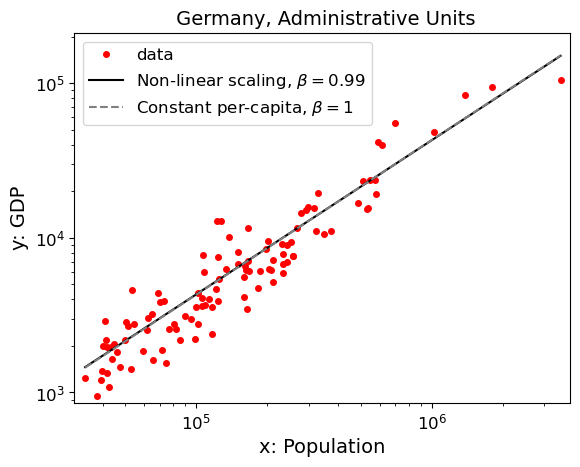

In [19]:
dataset="germany_gdp"

try:
    x=a.xy(dataset).x
    y=a.xy(dataset).y
except:
    print("Invalid Dataset Chosen. Available datasets are:\n")
    for i in a.DATABASES:
        print(i)


Y=np.sum(y)
X=np.sum(x)

Pop=a.PopulationAnalysis(dataset,required_successes=2)

from matplotlib.pyplot import *
#figure(figsize=(9,6))
figure()
xscale("log")
yscale("log")
xlim(0.9*min(x),1.1*max(x))
ylim(0.9*min(y),2*max(y))
plot(x, y, "o", ms=4,color="red",label="data")
#plot(x, np.exp(LS[2])*x**LS[0], "-", ms=2,color="red",label=r"Least Square fit, $\beta=$"+str(LS[0])[:4])
#plot(x, ln.params[0]*x**ln.params[1], "-", ms=2,color="blue",label=r"Lognormal Model, $\beta=$"+str(ln.params[1])[:4])
# People's model
Y=np.sum(y)
betaP=Pop.params[0]
Z=np.sum(np.power(x,betaP))
plot(x, Y*x**betaP/Z, "-", ms=2,color="black",label=r"Non-linear scaling, $\beta=$"+str(betaP)[:4])
plot(x,Y*x/X,"--",color="gray",label=r"Constant per-capita, $\beta=1$")
xlabel("x: Population",fontsize=14)
ylabel("y: GDP",fontsize=14)
title(" Germany, Administrative Units",fontsize=14)
legend(loc=0)
savefig("fig/urbanScalingGermany.png",dpi=300,bbox_inches='tight')
show()

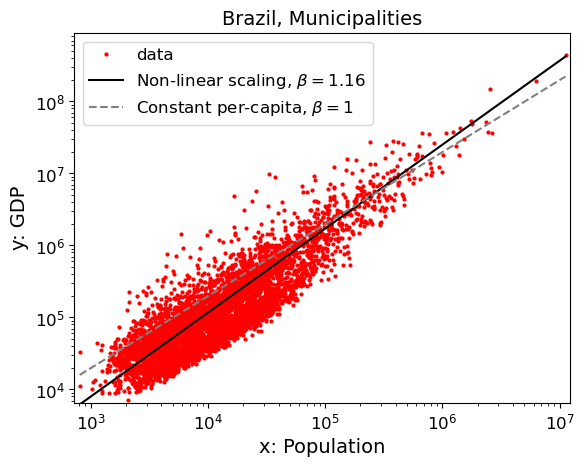

In [20]:
dataset="brazil_gdp_2010"

try:
    x=a.xy(dataset).x
    y=a.xy(dataset).y
except:
    print("Invalid Dataset Chosen. Available datasets are:\n")
    for i in a.DATABASES:
        print(i)


Y=np.sum(y)
X=np.sum(x)

Pop=a.PopulationAnalysis(dataset,required_successes=2)

from matplotlib.pyplot import *
#figure(figsize=(9,6))
figure()
xscale("log")
yscale("log")
xlim(0.9*min(x),1.1*max(x))
ylim(0.9*min(y),2*max(y))
plot(x, y, "o", ms=2,color="red",label="data")
#plot(x, np.exp(LS[2])*x**LS[0], "-", ms=2,color="red",label=r"Least Square fit, $\beta=$"+str(LS[0])[:4])
#plot(x, ln.params[0]*x**ln.params[1], "-", ms=2,color="blue",label=r"Lognormal Model, $\beta=$"+str(ln.params[1])[:4])
# People's model
Y=np.sum(y)
betaP=Pop.params[0]
Z=np.sum(np.power(x,betaP))
plot(x, Y*x**betaP/Z, "-", ms=2,color="black",label=r"Non-linear scaling, $\beta=$"+str(betaP)[:4])
plot(x,Y*x/X,"--",color="gray",label=r"Constant per-capita, $\beta=1$")
xlabel("x: Population",fontsize=14)
ylabel("y: GDP",fontsize=14)
title("Brazil, Municipalities",fontsize=14)
legend(loc=0)
savefig("fig/urbanScalingBrazil.png",dpi=300,bbox_inches='tight')
show()

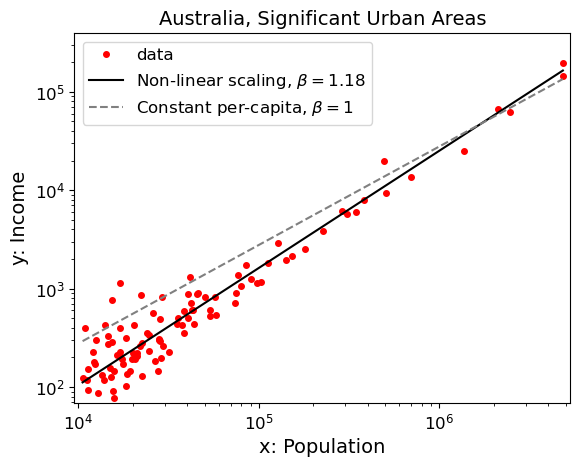

In [21]:
dataset="australia_income"

try:
    x=a.xy(dataset).x
    y=a.xy(dataset).y
except:
    print("Invalid Dataset Chosen. Available datasets are:\n")
    for i in a.DATABASES:
        print(i)


Y=np.sum(y)
X=np.sum(x)

Pop=a.PopulationAnalysis(dataset,required_successes=2)

from matplotlib.pyplot import *
#figure(figsize=(9,6))
figure()
xscale("log")
yscale("log")
xlim(0.9*min(x),1.1*max(x))
ylim(0.9*min(y),2*max(y))
plot(x, y, "o", ms=4,color="red",label="data")
#plot(x, np.exp(LS[2])*x**LS[0], "-", ms=2,color="red",label=r"Least Square fit, $\beta=$"+str(LS[0])[:4])
#plot(x, ln.params[0]*x**ln.params[1], "-", ms=2,color="blue",label=r"Lognormal Model, $\beta=$"+str(ln.params[1])[:4])
# People's model
Y=np.sum(y)
betaP=Pop.params[0]
Z=np.sum(np.power(x,betaP))
plot(x, Y*x**betaP/Z, "-", ms=2,color="black",label=r"Non-linear scaling, $\beta=$"+str(betaP)[:4])
plot(x,Y*x/X,"--",color="gray",label=r"Constant per-capita, $\beta=1$")
xlabel("x: Population",fontsize=14)
ylabel("y: Income",fontsize=14)
title("Australia, Significant Urban Areas",fontsize=14)
legend(loc=0)
savefig("fig/urbanScalingAustralia.png",dpi=300,bbox_inches='tight')
show()

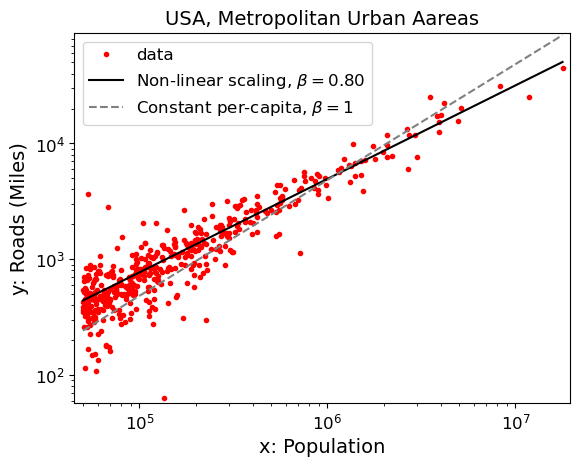

In [22]:
dataset="usa_miles"

try:
    x=a.xy(dataset).x
    y=a.xy(dataset).y
except:
    print("Invalid Dataset Chosen. Available datasets are:\n")
    for i in a.DATABASES:
        print(i)


Y=np.sum(y)
X=np.sum(x)

Pop=a.PopulationAnalysis(dataset,required_successes=2)

from matplotlib.pyplot import *
#figure(figsize=(9,6))
figure()
xscale("log")
yscale("log")
xlim(0.9*min(x),1.1*max(x))
ylim(0.9*min(y),2*max(y))
plot(x, y, "o", ms=3,color="red",label="data")
#plot(x, np.exp(LS[2])*x**LS[0], "-", ms=2,color="red",label=r"Least Square fit, $\beta=$"+str(LS[0])[:4])
#plot(x, ln.params[0]*x**ln.params[1], "-", ms=2,color="blue",label=r"Lognormal Model, $\beta=$"+str(ln.params[1])[:4])
# People's model
Y=np.sum(y)
betaP=Pop.params[0]
Z=np.sum(np.power(x,betaP))
plot(x, Y*x**betaP/Z, "-", ms=2,color="black",label=r"Non-linear scaling, $\beta=$"+str(betaP)[:4])
plot(x,Y*x/X,"--",color="gray",label=r"Constant per-capita, $\beta=1$")
xlabel("x: Population",fontsize=14)
ylabel("y: Roads (Miles)",fontsize=14)
title("USA, Metropolitan Urban Aareas",fontsize=14)
legend(loc=0)
savefig("fig/urbanScalingUSA.png",dpi=300,bbox_inches='tight')
show()

# Fitting and data analysis

## Only population (Zipf's law)

## Estimation of parameters

## Visual Inspection:

### Australia: $\gamma = 1.7$, $\alpha=1.43$ 

In [23]:
# Cumulative
xac = np.array(xa)
yac=[]

xac.sort()
xac=np.flip(xac)

y=1
for i in range(len(xac)):
    yac.append(y)
    y=y-1/len(xac)

In [24]:
len(xac)

102

In [25]:
xac

array([4830047, 4817843, 2447280, 2098239, 1368209,  693596,  508437,
        490517,  382903,  343180,  305691,  289630,  226653,  179011,
        153425,  142163,  127215,  111973,  103034,   97793,   90953,
         84333,   79293,   76452,   74195,   73747,   57722,   57003,
         53841,   53620,   50193,   46190,   45185,   43874,   43252,
         42827,   41920,   41600,   40578,   40544,   38678,   38595,
         37396,   35743,   35053,   31721,   29446,   29072,   28816,
         28418,   28363,   27828,   27826,   27489,   26519,   25912,
         24717,   24565,   23967,   22568,   22424,   22200,   21997,
         21154,   21087,   20569,   20244,   20105,   19882,   19255,
         18484,   18317,   18243,   17588,   17524,   17026,   17018,
         17013,   16985,   16307,   15684,   15654,   15525,   15301,
         15298,   15086,   15020,   14660,   14523,   14089,   13896,
         13515,   12756,   12563,   12385,   12272,   12003,   11352,
         11230,   11

### Brazil 

Plots above: ($x>10^4$): $\gamma=2.2$, $\alpha = 0.83$

In [26]:
#Thresholding to x>10000
xbc=np.array(xb)
xbc=xbc[xbc>10000]

xbc.sort()
xbc=np.flip(xbc)

ybc=[]
y=1
for i in range(len(xbc)):
    ybc.append(y)
    y=y-1/len(xbc)   

In [27]:
len(xbc)

3052

In [28]:
xbc

array([11253503,  6320446,  2675656, ...,    10036,    10013,    10004])

### UK

In [29]:
# Cumulative
xkc = np.array(xk)
ykc=[]

xkc.sort()
xkc=np.flip(xkc)

y=1
for i in range(len(xkc)):
    ykc.append(y)
    y=y-1/len(xkc)

In [30]:
len(xkc)

100

In [31]:
xkc

array([8542730, 2584602, 2447167, 1685831, 1270942, 1217761,  836012,
        661229,  649522,  507603,  489722,  449708,  425404,  425062,
        409876,  364118,  362659,  350600,  349530,  330973,  305219,
        277242,  263015,  242153,  239803,  226233,  224150,  218008,
        203782,  199754,  197719,  190674,  181034,  176972,  163483,
        163268,  154597,  154478,  147196,  144999,  141711,  138166,
        136231,  135108,  129989,  125940,  123089,  120816,  112767,
        112718,  112249,  111925,  109885,  105040,  103675,  102036,
        101357,  100180,   99875,   95048,   92211,   91077,   89542,
         89456,   88726,   87066,   86999,   85830,   85287,   83817,
         82772,   81641,   81305,   79715,   79134,   79089,   78235,
         77596,   72994,   72979,   72825,   68875,   68611,   68247,
         66944,   65895,   65395,   62753,   62313,   61384,   61045,
         60091,   56945,   56651,   56446,   54283,   54036,   53213,
         52942,   50

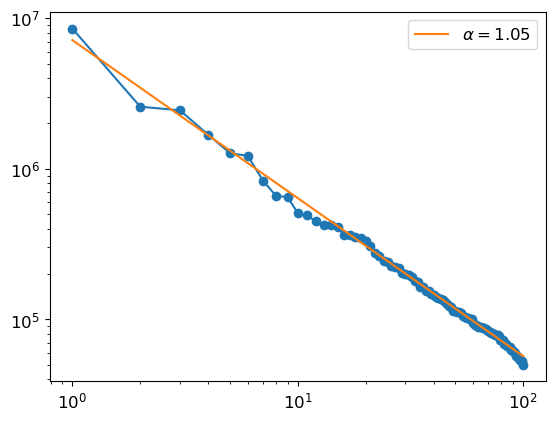

In [32]:
r=np.arange(len(xkc))+1
alphak=1.05

Pk = sum(xkc) #total population
Nk = len(xkc) # number of cities
Ck=Pk/np.sum((1/r**alphak)[:Nk])

plot(r,xkc,"-o")
plot(r,Ck/r**alphak,label=r"$\alpha=$"+str(alphak))
xscale("log")
yscale("log")
legend()
show()

# Linear regression

## Rank frequency

### Australia

In [33]:
sp.stats.linregress(np.log(np.arange(len(xac))+1),np.log(xac))

LinregressResult(slope=-1.4517518627701933, intercept=15.987714516032284, rvalue=-0.9944099410072205, pvalue=1.8398480612971077e-99, stderr=0.015414957985272053, intercept_stderr=0.05814052695596833)

### Brazil

In [34]:
sp.stats.linregress(np.log(np.arange(len(xbc))+1),np.log(xbc))

LinregressResult(slope=-0.9080382498077236, intercept=16.59425809485645, rvalue=-0.9979836026125006, pvalue=0.0, stderr=0.001045718618475781, intercept_stderr=0.007419458545971197)

### UK

In [35]:
sp.stats.linregress(np.log(np.arange(len(xkc))+1),np.log(xkc))

LinregressResult(slope=-1.0428024988482354, intercept=15.734107647271843, rvalue=-0.997956231445169, pvalue=7.013847399008654e-119, stderr=0.006745068623156286, intercept_stderr=0.025312709642382067)

## Cumulative frequency

$\alpha = 1 / (\gamma-1)$

$\sigma_\alpha = (\gamma -1)^{-2} \sigma_\gamma = \alpha^2 \sigma_\gamma$

fitted is $\tilde{\gamma} = \gamma-1$

### Australia

In [36]:
xac.sort() # population needs to be small to large here

gamma,c,r,p,sg = sp.stats.linregress(np.log(xac), np.log(yac))
alpha = -1/(gamma)
sa=alpha*alpha*sg
print(alpha,sa)

1.4681197377343471 0.01558875497589446


### Brazil

In [37]:
xbc.sort()
gamma,c,r,p,sg = sp.stats.linregress(np.log(xbc), np.log(ybc))
alpha = -1/(gamma)
sa=alpha*alpha*sg
print(alpha,sa)

0.9117112874345603 0.0010499485766746308


### UK

In [38]:
xkc.sort()
gamma,c,r,p,sg = sp.stats.linregress(np.log(xkc), np.log(ykc))
alpha = -1/(gamma)
sa=alpha*alpha*sg
print(alpha,sa)

1.0470780957868346 0.006772724094627277


## Maximum likelihood

### Rank representation

In [39]:
from modules_distributor import fit
from general import *

No upper bound in rank to be used in normalization

In [40]:
# Australia
resa = fit(model = "simple", counts = xac, nrep = 10)
# Brazil
resb = fit(model = "simple", counts = xbc, nrep = 10)
# UK
resk = fit(model = "simple", counts = xkc, nrep = 10)

print("Australia:",resa)
print("Brazil:",resb)
print("UK:",resk)


Australia: ([1.5464168467426778], 2.9695934312448324, 10)
Brazil: ([1.191732426912873], 7.327408328030239, 10)
UK: ([1.4224128677421455], 3.737344427690202, 10)


Functions to use with maximum rank "rmax_fit"

In [41]:
from modules_fitting_pow import *

In [42]:
def fit_simple(counts,nrep,rmin_fit,rmax_fit):
    '''Fits simple power law '''

    L = np.inf # normalized negative log-likelihood
    gamma = -1

    # range to sample initial conditions for the free parameters
    x1_0 = (1.,3.)

    n_success = 0
    np.random.seed(41)
    for i_nrep in range(nrep):

#        gamma_0 =  np.random.random()*( x1_0[1]-x1_0[0]  ) + x1_0[0] 
        gamma_0 =  1.05
#        print(gamma_0,b_0)
        result = mle_disc_minmax_optimize_powzipf(counts,rmin_fit,rmax_fit,gamma_0)

        gamma_tmp, = result['x']
        L_tmp = result['fun']
        warnflag = result['success']
        if warnflag==True:
            n_success+=1
        if L_tmp<L and warnflag==True:
            L=L_tmp
            gamma = gamma_tmp
#        print(gamma,L,warnflag)
#        print('')
    return([gamma],L,n_success)


In [43]:

# Australia
resa2 = fit_simple(counts=xac,nrep=1,rmin_fit=1,rmax_fit=len(xac))
print("Australia:",resa2)


# Brazil
resb2 = fit_simple(counts=xbc,nrep=1,rmin_fit=1,rmax_fit=45*len(xbc)) #45* used to avoid error in zeta function
print("Brazil:",resb2)


# UK
resk2 = fit_simple(counts=xkc,nrep=1,rmin_fit=1,rmax_fit=len(xkc))
print("UK:",resk2)




Australia: ([1.3446459960937502], 2.8736714574178346, 1)
Brazil: ([1.0767626953125], 7.1542308504761, 1)
UK: ([1.07896728515625], 3.498788216534318, 1)


Plot for UK

Linear regression: LinregressResult(slope=-1.0428024988482354, intercept=15.734107647271843)

MLE rank, with cuttoff at max rank: 1.0789672

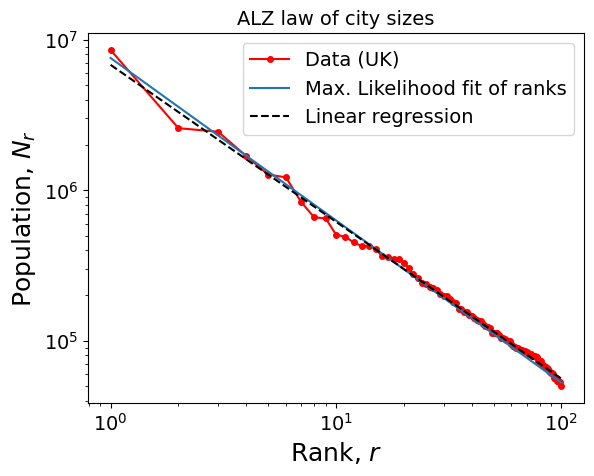

In [44]:
r=np.arange(len(xkc))+1
r2=np.array([1,len(r)])
alphak=1.05
xkc.sort()
xkc=np.flip(xkc)

Pk = sum(xkc) #total population
Nk = len(xkc) # number of cities
Ck=Pk/np.sum((1/r**alphak)[:Nk])
plot(r,xkc,"-o",ms=4,color="red",label="Data (UK)")
#plot(r,Ck/r**alphak,label=r"$\alpha=$"+str(alphak))
plot(r,np.sum(xkc)*pdf_power_disc(np.arange(len(xkc))+1,1,len(xkc),1.0789672),label="Max. Likelihood fit of ranks")
#plot(r,np.sum(xkc)*pdf_power_disc(np.arange(len(xkc))+1,1,len(xkc),1.12),label=r"$\alpha=1.12$")

yl=-1.0428025*np.log(r2)+15.7341076472
plot(r2,np.exp(yl),"--",color="black",label="Linear regression")
xscale("log")
yscale("log")
xlabel(r"Rank, $r$",fontsize=18)
ylabel(r"Population, $N_r$",fontsize=18)
title("ALZ law of city sizes",fontsize=14)
legend(fontsize=14)
tick_params(axis='both', which='major', labelsize=14)
savefig("fig/fitALZ-UK.png",dpi=300,bbox_inches='tight')
show()

### Frequency distribution representation 

In [45]:
from stats import xdata_to_xnx, x_autocorr_sm_ext, determine_tau
from powerlaw_fit import *

In [46]:
def fitpx(x):
    nx = np.array([int(1) for i in range(len(x))]) #vector of ones, the number of times each population is seen
    result = fit_power_disc(x,nx,xmin=min(x),xmax=None)
    return(result)

In [47]:
fita=fitpx(xac)
fitb=fitpx(xbc)
fitk=fitpx(xkc)

In [48]:
for fit in [fita,fitb,fitk]:
    g=fit[0][0]
    a = 1/(g-1)
    print(g,a)

1.7063195629609005 1.415789753589703
1.9955731293030643 1.0044465550210608
1.8923342993265064 1.120656239208506


## As a function of threshold

In [49]:
np.log(1000000)/np.log(1.2)

75.77551881908002

In [50]:
np.log(1000)/np.log(1.2)

37.88775940954001

In [51]:
def fitForThresh(x):
    alphat=[]
    x.sort()
    
    ri=np.log(x[0])/np.log(1.2)
    rf=np.log(x[-10])/np.log(1.2)
    r=np.arange(int(ri-1),int(rf+1))
    xts=np.power(1.2,r)
    
    
    
    for xt in xts:
     #   xc=np.array(x[:])
        xc=x[x>xt]
        
        xc.sort()
        xc=np.flip(xc)
        
        fitB = sp.stats.linregress(np.log(np.arange(len(xc))+1),np.log(xc))
        alphat.append(-fitB[0])
    return(alphat,xts)


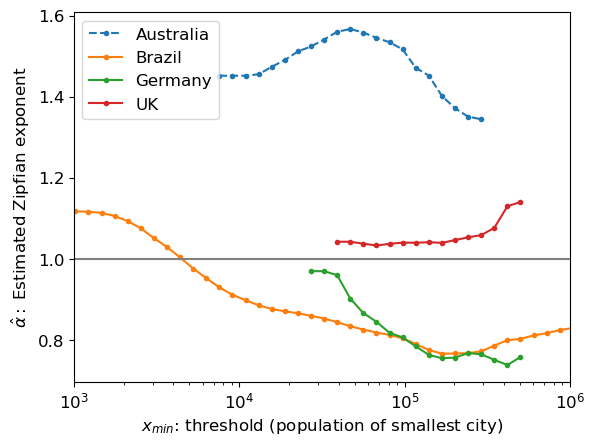

In [52]:
alphaA,xisA = fitForThresh(xa)
alphaB,xisB = fitForThresh(xb)
alphaK,xisK = fitForThresh(xk)
alphaU,xisU = fitForThresh(xu)
alphaG,xisG = fitForThresh(xg)


plot(xisA,alphaA,"--.",label="Australia")
plot(xisB,alphaB,".-",label="Brazil")
plot(xisG,alphaG,".-",label="Germany")
plot(xisK,alphaK,".-",label="UK")
plot([10**3,10**6],[1,1],"-",color="grey")
#plot(xisU,alphaU,".-",label="USA")
xlim(10**3,10**6)
xscale("log")
xlabel(r"$x_{min}$: threshold (population of smallest city)")
ylabel(r"$\hat{\alpha}:$ Estimated Zipfian exponent")
legend()
savefig("fig/threshold-zipf.png",dpi=300,bbox_inches='tight')
show()



Brazil analysis

In [53]:
len(xb)

5565

In [54]:
sum(xb)

190755799

In [55]:
sum(xb[:int(len(xb)/2)])/sum(xb)

0.08248033916913844

In [56]:
for i in np.arange(210,220):
    print(i,sum(xb[-i:])/sum(xb))

210 0.5056377132733983
211 0.5062742758347284
212 0.5069081700630239
213 0.507541943718314
214 0.5081726453831162
215 0.5088005109611373
216 0.5094259860482668
217 0.510050465097525
218 0.510673476301499
219 0.5112958427020088


## Urban scaling

In [57]:
sys.path.append("../src/")
sys.path.append("../data/")
sys.path.append("../data/cities/")

import analysis as a

MIN_VALUE = 10**-8

In [58]:
def betaForThresh(dataset):

    x=a.xy(dataset).x
    y=a.xy(dataset).y
    
    betat=[]
    
    ri=np.log(x[0])/np.log(1.2)
    rf=np.log(x[-10])/np.log(1.2)
    r=np.arange(int(ri-1),int(rf+1))
    xts=np.power(1.2,r)
    
    
    for xt in xts:
     #   xc=np.array(x[:])
        xc=x[x>xt]
        yc=y[x>xt]
        fit = sp.stats.linregress(np.log(xc),np.log(yc))
        betat.append(fit[0])
    return(betat,xts)

In [59]:
betaA,xisA = betaForThresh("australia_income")
betaB,xisB = betaForThresh("brazil_gdp_2010")
betaG,xisG = betaForThresh("germany_gdp")
betaU,xisU = betaForThresh("usa_miles")

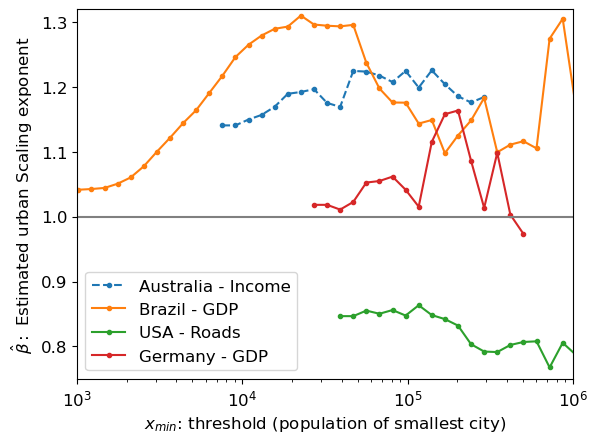

In [60]:
plot(xisA,betaA,"--.",label="Australia - Income")
plot(xisB,betaB,".-",label="Brazil - GDP")
plot(xisU,betaU,".-",label="USA - Roads")
plot(xisG,betaG,".-",label="Germany - GDP")
#plot(xisU,alphaU,".-",label="USA")

xscale("log")
xlabel(r"$x_{min}$: threshold (population of smallest city)")
ylabel(r"$\hat{\beta}:$ Estimated urban Scaling exponent")
xlim(10**3,10**6)
ylim(0.75,1.32)
plot([10**3,10**6],[1,1],"-",color="grey")
legend(loc=3)
savefig("fig/threshold-scaling.png",dpi=300,bbox_inches='tight')
show()




In [61]:
import uk
#xk,yk=uk.row('Income') 
xkt,ykt=uk.row('Train') 


In [62]:
dataset="uk_train"
Pop=a.PopulationAnalysis(dataset,required_successes=2)

In [63]:
def summary(func):
    print(func.description,'\t Dataset:',func.dataset)
    print('Beta +- error:\t',func.beta)
    print('P-value:\t',func.p_value)
    print('BIC:\t\t',func.bic,'\n')
    
summary(Pop)

People model with free \delta 	 Dataset: uk_train
Beta +- error:	 (1.1878666961096518, 0.12766563589247545)
P-value:	 0.0
BIC:		 13187.867577015048 



In [68]:
LS=a.mls_best_fit(np.log(x),np.log(y))

In [69]:
LS

(1.0350515530971103, 0.12130004692305639, -11.149251178316476)

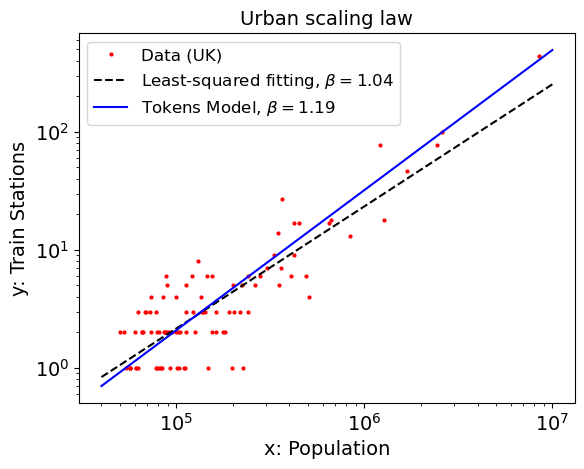

In [71]:
x,y=xkt[ykt>0],ykt[ykt>0]
#x,y=xg[yg>0],yg[yg>0]
r=np.array([40000,10**7])
figure()
xlabel("x: Population",fontsize=14)
ylabel("y: Train Stations",fontsize=14)
xscale("log")
yscale("log")
plot(x,y,"o",ms=2,color="red",label="Data (UK)")
plot(r, np.exp(LS[2])*r**LS[0], "--", ms=4,color="black",label=r"Least-squared fitting, $\beta=1.04$")


# People's model
Y=np.sum(y)
betaP=1
Z=np.sum(np.power(x,betaP))
#plot(x, Y*x**betaP/Z, "--", ms=2,color="gray",label=r"Constant per-capita, $\beta=1$")
betaP=1.1878666961
Z=np.sum(np.power(x,betaP))
plot(r, Y*r**betaP/Z, "-", ms=2,color="blue",label=r"Tokens Model, $\beta=1.19$")
legend(fontsize=12,loc=0)
title("Urban scaling law",fontsize=14)
tick_params(axis='both', which='major', labelsize=14)

savefig("fig/fitScalingUK.png",dpi=300,bbox_inches='tight')

show()

### Australia Spatial

In [72]:
# Code from
# https://github.com/edugalt/scaling/blob/master/notebooks/Notebook-SpatialModels.ipynb
sys.path.append("../data/cities/")
sys.path.append("../src/")
from spatial import *
import matplotlib.pyplot as plt

In [73]:
#country="Australia";data="area"
country="Australia";data="income"
#country="Australia";data="education"
#Import data
d=getData(country,data);x,y,l,names=d[0],d[1],d[2],d[3];

#Compute the 
dmat = dmatrix(l);

Least square fitting

In [74]:
betaOLS,alphaOLS=np.polyfit(np.log(x[y>0]),np.log(y[y>0]),1)
print(betaOLS)

1.1541948264931121


In [75]:
models=["percapita","city","gravitational","exponential"]

Fitting and Description Length

In [79]:
models

['percapita', 'city', 'gravitational', 'exponential']

In [81]:

print("Model alpha beta DescriptionLength\n")
eps=10**(-6) # precision of integration method

for model in models[2:]:

    alphaML,betaML,logLML= MLparameters(x,y,l,model)
    neglogLML = -logLML

    amin=max(-alphaML,-2) #minimum alpha should be larger than 0
    amax=min(6371-alphaML,2) # maximum alpha shoulbe smaller than the earth's radius

    bmin=max(-betaML,-0.025) #the minimum beta should be larger than 0
    bmax=min(2-betaML,0.025) #the maximum beta should be smaller than 2

    
    if model=="city":
        #integrate over beta only
        gbeta = lambda be: np.exp(log_likelihood_alphabeta(alphaML,betaML+be,x,y,l,model)-neglogLML)
        I=sp.integrate.quad(gbeta,bmin,bmax,epsrel=eps)[0]

    if model=="gravitational" or model=="exponential":
        #integrate over alpha and beta; first term of par is the variation in alpha, second is the variation in beta, third is precision
        g2 =  lambda ae,be: np.exp(log_likelihood_alphabeta(alphaML+ae,betaML+be,x,y,l,model)-neglogLML)
        I=sp.integrate.dblquad(g2,bmin,bmax,lambda be:amin,lambda be:amax,epsrel=eps,epsabs=eps)[0]

        T12=logLikelihood12(y)
    prior=negLogPrior(model)
    D=-1.*np.log(I)+logLML+T12+prior
    print(model,alphaML,betaML,D)

Model alpha beta DescriptionLength

gravitational 8.290396663870524 1.1998449762057295 2830209.5304853334
exponential 9.513637748108595 1.1953204693665263 2830271.4599921745


Uncertainty in
computed using bootstrapping

In [78]:
def surrogate(x,y):
    "Return (x_s,y_s) by sampling with replacement (x,y) the same number of elements of (x,y)"
    x_s=[];y_s=[];
    N=len(x);
    r=[np.random.randint(0,N) for i in range(N)] #N random numbers in [0,N)
    r.sort()
    x_s=[x[i] for i in r]
    y_s=[y[i] for i in r]
    return x_s,y_s

S=10 # number of surrogates
betas={}
alphas={}
for mdl in ["city","gravitational","exponential"]:
    betas[mdl]=[]
    alphas[mdl]=[]
for s in range(S):
    xs,ys=surrogate(x,y)
    for mdl in ["city","gravitational","exponential"]:
        mlpar = MLparameters(xs,ys,l,mdl)
        betas[mdl].append(mlpar[1])
        alphas[mdl].append(mlpar[0])
    print("Surrogate ",str(s)," out of ",str(S))
    
print(country,data,"\n","\t <beta>, \t sigma_beta")
for mdl in ["city","gravitational","exponential"]:
    print(mdl,np.average(betas[mdl]),np.std(betas[mdl]),np.average(alphas[mdl]),np.std(alphas[mdl]))

Surrogate  0  out of  10
Surrogate  1  out of  10
Surrogate  2  out of  10
Surrogate  3  out of  10
Surrogate  4  out of  10
Surrogate  5  out of  10
Surrogate  6  out of  10
Surrogate  7  out of  10
Surrogate  8  out of  10
Surrogate  9  out of  10
Australia income 
 	 <beta>, 	 sigma_beta
city 1.170062294711736 0.035866698267683364 0.0 0.0
gravitational 1.192379525204459 0.0701561381306084 14.447922195884823 19.8148646021898
exponential 1.1951751866153428 0.058548389513090784 27.676321987263957 32.02285161064349
